# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

En primera instancia vamos a importar la librería "pandas" para leer los datasets, luego de leer los 5 datasets, se almacenará en 5 DataFrames diferentes; por último verificaremos la estructura de cada Dataframe, columnas y tipo de datos.

In [16]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [17]:
# leer conjuntos de datos en los DataFrames

# Definimos el separador de las columnas con sep = ';' en los 5 DataFrames, dado que
# las columnas no están separadas por comas (por defecto de un csv).

df_instacart_orders = pd.read_csv(
    "https://drive.google.com/uc?id=15AbAKmsxiHOzx3a4LEEFZFH4z4PgcgYU",
    sep=';')
df_products = pd.read_csv(
    "https://drive.google.com/uc?id=1MqC92OnOfs1s77YXkWYrDOKnzK2H658Q",
    sep=';')
df_aisles = pd.read_csv(
    "https://drive.google.com/uc?id=1WnU3DEWHYWna0jox4p-uastjjJZ9p0Bp",
    sep=';')
df_departments = pd.read_csv(
    "https://drive.google.com/uc?id=1Md_Ze5Z6HESNDnAMBhFYYP70GOGE7IeT",
    sep=';')
df_order_products = pd.read_csv(
    "https://drive.google.com/uc?id=1denInfaIKJ7jnLGaJrQzd-ZLTqwH0O1B",
    sep=';')

In [18]:
# mostrar información del DataFrame
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [19]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [20]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [21]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [22]:
# mostrar información del DataFrame
# agregamos el argumento "show_counts=True" para imprimir recuentos no nulos
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

En el Paso 1 se realizó la carga y revisión inicial de los cinco conjuntos de datos principales: `instacart_orders`, `products`, `aisles`, `departments` y `order_products`. Se verificó la estructura de cada DataFrame, el tipo de datos de sus columnas y la presencia de valores nulos. Se identificó que los archivos CSV requerían el parámetro `sep=';'` para su correcta lectura. Además, se observó que algunos DataFrames contienen valores ausentes y que el volumen de datos es considerable, lo que puede afectar la visualización de información completa en pantalla. Esta revisión inicial permitió conocer la estructura y calidad de los datos, sentando las bases para el preprocesamiento y análisis posterior.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Vamos a verificar si existen filas y ID's (datos únicos) duplicados en cada DataFrame, vamos a tratar o eliminar valores ausentes según sea el caso en los DataFrames.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [23]:
# Revisa si hay pedidos duplicados
# Lo podemoas hacer con el duplicated().sum() sobre el DataFrame:
df_instacart_orders.duplicated().sum()

np.int64(15)

In [24]:
# Mostramos las filas duplicadas con el siguiente filtro 
# y ordenamos por la columna 'order_id':
df_instacart_orders[df_instacart_orders.duplicated()].sort_values('order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
371905,391768,57671,19,3,2,10.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
273805,1112182,202304,84,3,2,6.0
411408,1286742,183220,48,3,2,4.0
266232,1782114,106752,1,3,2,NaN
230807,1918001,188546,14,3,2,16.0
323900,1919531,191501,32,3,2,7.0


¿Tienes líneas duplicadas?
SI, se tiene 15 líneas duplicadas.
¿Qué tienen en común?
Todas se generaron a las 2 hrs del día 3.

In [25]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_miercoles_2am = df_instacart_orders[df_instacart_orders['order_dow'] == 3 ]
df_miercoles_2am = df_miercoles_2am[df_miercoles_2am['order_hour_of_day'] == 2]
print(df_miercoles_2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? Los pedidos duplicados son 15 y se realizaron el día 3 a las 2 hrs.

In [26]:
# Elimina los pedidos duplicados
#Eliminamos las filas duplicadas y guardamos el resultado
df_instacart_orders.drop_duplicates(inplace=True)

#Se actualizan los índices y se eliminan los índices antiguos
df_instacart_orders.drop_duplicates().reset_index(drop=True)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [27]:
# Vuelve a verificar si hay filas duplicadas
df_instacart_orders.duplicated().sum()

np.int64(0)

In [28]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
# usamos el método nunique para ver el número de datos únicos de la columna order_id
df_instacart_orders['order_id'].nunique()

478952

Se encontraron 15 valores duplicados que se generaron el día 3 a las 2 hrs, se procedió a eliminar los duplicados y por último se verificó que los datos de la columna "order_id" sean únicos, el resultado dió 478952, es el mismo valor del nuevo DF después de eliminar los duplicados (478952 rows).

### `products` data frame

In [29]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()

np.int64(0)

In [30]:
# Revisa únicamente si hay ID de productos duplicados

# Número de productos 49694
df_products['product_id'].nunique()

49694

In [31]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()

In [32]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products['product_name'].value_counts()

product_name
GREEN TEA WITH GINSENG AND HONEY                                        3
CARROT AND CELERY STICKS                                                2
APRICOT ENERGY BAR                                                      2
TOP THE TATER CHIVE & ONION SOUR CREAM                                  2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD    2
                                                                       ..
ALL NATURAL CHICKEN APPLE SAUSAGE                                       1
QUARTERED ARTICHOKE HEARTS                                              1
BIG EYE IPA                                                             1
UNSTOPABLES LUSH                                                        1
FRESH FOAMING CLEANSER                                                  1
Name: count, Length: 48332, dtype: int64

In [33]:
# Verificamos con un producto que se repite el nombre si los códigos son diferentes
df_products[df_products['product_name'] == 'GREEN TEA WITH GINSENG AND HONEY']

,product_id,product_name,aisle_id,department_id
2037,2038,GREEN TEA WITH GINSENG AND HONEY,94,7
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
19813,19814,GREEN TEA WITH GINSENG AND HONEY,94,7


Revisando filas duplicadas no se encontró ninguna, revisando ID's de productos tampoco se encontró duplicados, pero convirtiendo los nombres de los productos a mayúsculas y revisando si existen duplicados, se encontró nombres de productos duplicados, como tienen diferente ID los productos, no se pueden eliminar los duplicados.

### `departments` data frame

In [34]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

np.int64(0)

In [35]:
# Revisa únicamente si hay IDs duplicadas de departamentos
df_departments['department_id'].value_counts()

department_id
1     1
12    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
11    1
2     1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
21    1
Name: count, dtype: int64

Revisamos si existen duplicados en las filas del DF y en la columna 'department_id', dado que debe ser una columna única. No se realizó ninguna corrección dado que no hay duplicados en las filas del DF y en la columna ID.

### `aisles` data frame

In [36]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()

np.int64(0)

In [37]:
# Revisa únicamente si hay IDs duplicadas de pasillos
df_aisles['aisle_id'].value_counts()

aisle_id
1      1
85     1
99     1
98     1
97     1
      ..
40     1
39     1
38     1
37     1
134    1
Name: count, Length: 134, dtype: int64

Revisamos si existen duplicados en las filas del DF y en la columna 'aisle_id', dado que debe ser una columna única. No se realizó ninguna corrección dado que no hay duplicados en las filas del DF y en la columna ID.

### `order_products` data frame

In [38]:
# Revisa si hay filas totalmente duplicadas
df_order_products.duplicated().sum()

np.int64(0)

In [39]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

# Creamos un condicional para verificar si existe convinaciones duplicadas de las
# columnas 'order_id' y 'product_id'; ya que en combinación deben ser únicos.
if df_order_products[['order_id', 'product_id']].duplicated().any():
    print("Hay combinaciones de 'order_id' y 'product_id' repetidas")
else:
    print("No hay combinaciones de 'order_id' y 'product_id' repetidas")

No hay combinaciones de 'order_id' y 'product_id' repetidas


In [40]:
df_order_products['order_id'].value_counts()

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
3076918      1
2499566      1
556604       1
171279       1
1461911      1
Name: count, Length: 450046, dtype: int64

Revisamos si existen duplicados en las filas del DF y en la combinación de columnas 'order_id', 'product_id', dado que en combinación deben ser valores únicos. No se realizó ninguna corrección dado que no hay duplicados en las filas del DF y en la combinación de columnas 'order_id' y 'product_id'.
Las columnas por independiente de 'order_id' y 'product_id', se pueden duplicar dado que son heredadas de otras tablas (DF); en este DF 'df_order_products' se almacena el histórico de artículos pedidos dentro de un pedido.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [41]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products['product_name'].isna().sum()

np.int64(1258)

Se tiene 1258 valores ausentes en la columna 'product_name'

In [42]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

# buscamos el valor de 'aisle_id' donde la columna 'product_name' es NaN
# luego obtenemos un resumen y cuenta de todos los valores con 'value_counts()'
df_products[df_products['product_name'].isna()]['aisle_id'].value_counts()

aisle_id
100    1258
Name: count, dtype: int64

Encontramos 1258 valores ausentes en la columna 'product_name', de los cuales todos pertenecen al pasillo con ID 100.

In [43]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# buscamos el valor de 'department_id' donde la columna 'product_name' es NaN
# luego obtenemos un resumen y cuenta de todos los valores con 'value_counts()'

df_products[df_products['product_name'].isna()]['department_id'].value_counts()

department_id
21    1258
Name: count, dtype: int64

Encontramos 1258 valores ausentes en la columna 'product_name', de los cuales todos pertenecen al departamento con ID 21.

In [44]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# Verificamos los datos del departamento con ID 21
df_departments[df_departments['department_id'] == 21]

,department_id,department
20,21,missing


In [45]:
# Verificamos los datos del pasillo con ID 100
df_aisles[df_aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


Tanto para el pasillo con ID 100 y departamento con ID 21 el nombre es 'missing', quiere decir desaparecido, por lo cual los valores de los nombres de los productos son ausentes.

In [46]:
# Completa los nombres de productos ausentes con 'Unknown'
# Reemplazamos los valores ausentes por 'Unknown'
df_products['product_name'].fillna('Unknown', inplace = True)

# Verificamos nuevamente si existen valores ausentes
df_products['product_name'].isna().sum()

/var/folders/05/s3zd8b1n5qsd1bpkp2xg179w0000gn/T/ipykernel_3335/4192442338.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products['product_name'].fillna('Unknown', inplace = True)


np.int64(0)

Remplazamos valores ausentes de la columna 'product_name' por el valor 'Unknown'

### `orders` data frame

In [47]:
# Encuentra los valores ausentes
df_instacart_orders['days_since_prior_order'].isna().sum()

np.int64(28817)

In [48]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# Asumiendo de que un cliente tiene en 0 la columna 'days_since_prior_order' cuando es su primer pedido
len(df_instacart_orders[df_instacart_orders['days_since_prior_order']==0])

9589

Si asumimos que un cliente tiene la columna 'days_since_prior_order' en 0, entonces tenemos 28817 valores ausentes.

### `order_products` data frame

In [49]:
# Encuentra los valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [50]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
val_max = df_order_products['add_to_cart_order'].max()
val_min = df_order_products['add_to_cart_order'].min()
print(f'Valor mínimo: {val_min} y valor máximo: {val_max}')

Valor mínimo: 1.0 y valor máximo: 64.0


Se tiene 836 valores ausentes en la columna 'add_to_cart_order' y se tiene como valor mínimo: 1.0 y valor máximo: 64.0

In [51]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ids_pedidos = df_order_products[df_order_products['add_to_cart_order'].isna()]
print(ids_pedidos)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [52]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
valor_min = df_order_products[df_order_products['order_id'].isin(ids_pedidos['order_id'])].groupby('order_id')['product_id'].count().min()
valor_max = df_order_products[df_order_products['order_id'].isin(ids_pedidos['order_id'])].groupby('order_id')['product_id'].count().max()
print(f'El número mínimo de productos de un pedido es: {valor_min}, y máximo es: {valor_max}')

El número mínimo de productos de un pedido es: 65, y máximo es: 127


Se tiene que un pedido tiene como máximo 63 productos asociados y como mínimo 1 producto asociado a un pedido.

In [53]:
# Código del revisor
df_order_products[df_order_products['order_id'].isin(ids_pedidos['order_id'])].groupby('order_id')['product_id'].count().min()

65

In [54]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
# Reemplazamos los valores ausentes por el valor 999 y guardamos el cambio
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)

# Verificamos si al convertir la columna 'add_to_cart_order' a 'int' no se pierda ningun valor
np.array_equal(df_order_products['add_to_cart_order'], 
               df_order_products['add_to_cart_order'].astype('int'))

True

In [55]:
# Convertimos la columna 'add_to_cart_order' en entero ya que pasó la validación de igualdad (True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')

Reemplazamos los valores ausentes con el valor 999, luego verificamos si era seguro convertir la columna que contenía los nulos a tipo de dato entero; la respuesta retornó un True, lo que significa que no se perdería datos en la conversión a entero los valores de la columna 'add_to_cart_order', finalmente se precedió a convertir a entero los datos.

## Conclusiones

Durante el preprocesamiento de los datos, se identificaron y eliminaron filas duplicadas en el DataFrame `df_instacart_orders`, asegurando que cada pedido sea único. En el DataFrame `df_products`, aunque no se encontraron filas ni IDs duplicados, sí se detectaron nombres de productos repetidos, pero estos corresponden a diferentes IDs, por lo que no se eliminaron. Los DataFrames `df_departments` y `df_aisles` no presentaron duplicados.

Respecto a los valores ausentes, en `df_products` se encontraron 1258 valores nulos en la columna `product_name`, todos asociados al pasillo y departamento con nombre 'missing', por lo que se reemplazaron por 'Unknown'. En `df_instacart_orders`, los valores ausentes en `days_since_prior_order` corresponden al primer pedido de cada cliente, lo cual es esperado. En `df_order_products`, los valores ausentes en `add_to_cart_order` se reemplazaron por 999 y la columna se convirtió a tipo entero, ya que estos casos representan situaciones atípicas.

En resumen, se limpiaron los datos eliminando duplicados y gestionando los valores ausentes de manera adecuada, dejando los DataFrames listos para el análisis exploratorio.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [56]:
#Verificamos que 'order_hour_of_day' oscile entre 0 y 23
df_instacart_orders['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64

In [57]:
#Verificamos que 'order_dow' oscile entre 0 y 6
df_instacart_orders['order_dow'].value_counts().sort_index()

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: count, dtype: int64

En la verificación de las columnas `'order_hour_of_day'` y `'order_dow'` del DataFrame `df_instacart_orders`, se observa que los valores de `'order_hour_of_day'` están comprendidos entre 0 y 23, representando correctamente las horas del día. Asimismo, los valores de `'order_dow'` oscilan entre 0 y 6, lo que corresponde a los días de la semana de domingo a sábado.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

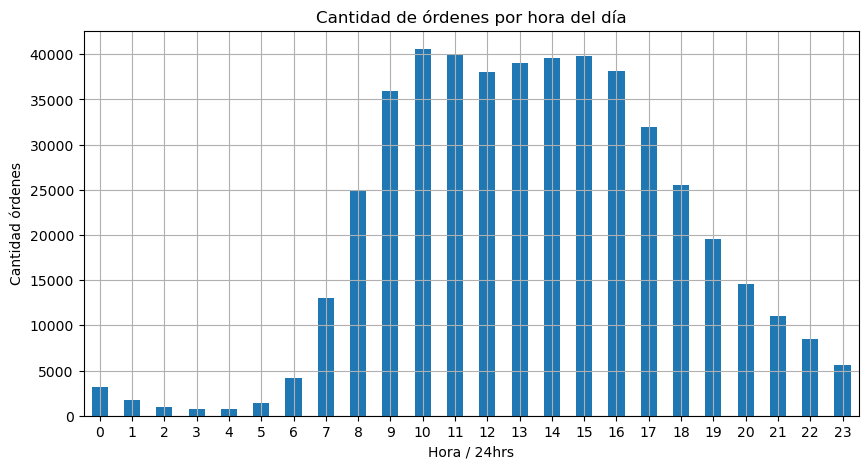

In [58]:
#Obtenemos la catidad de pedidos por hora, ordenamos las horas y gráficamos
df_instacart_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
                                                                          xlabel='Hora / 24hrs', 
                                                                          ylabel='Cantidad órdenes',
                                                                          title='Cantidad de órdenes por hora del día',
                                                                          grid=True,
                                                                          figsize=(10, 5),
                                                                          rot=0)
plt.show()

El gráfico muestra que la mayor cantidad de órdenes se realiza entre las 9hrs y las 17hrs, alcanzando su punto máximo a las 10 de la mañana. Esto indica que la mayoría de las personas prefieren hacer sus compras durante el día, especialmente en horas laborales o justo antes del almuerzo. Por lo contrario, durante la madrugada y la noche (de 0hrs a 7hrs y después de las 20hrs), la cantidad de órdenes disminuye considerablemente, lo que sugiere que son horarios poco habituales para realizar pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

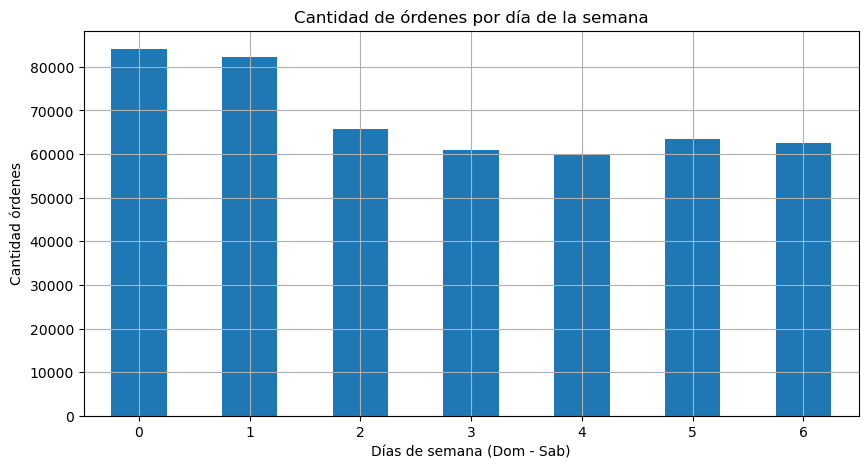

In [59]:
#Obtenemos la catidad de pedidos por día de la semana, donde 0 es Domingo, ordenamos por días y gráficamos
df_instacart_orders['order_dow'].value_counts().sort_index().plot(kind='bar',
                                                                  xlabel='Días de semana (Dom - Sab)', 
                                                                  ylabel='Cantidad órdenes',
                                                                  title='Cantidad de órdenes por día de la semana',
                                                                  grid=True,
                                                                  figsize=(10, 5),
                                                                  rot=0)
plt.show()

El gráfico muestra que la mayor cantidad de pedidos se realiza durante los días domingo (0) y el lunes (1). Se observa un ligero descenso en la cantidad de órdenes en el resto de días de la semana, particularmente los miércoles y jueves. Esto sugiere que las personas tienden a hacer sus compras principalmente a inicios de la semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

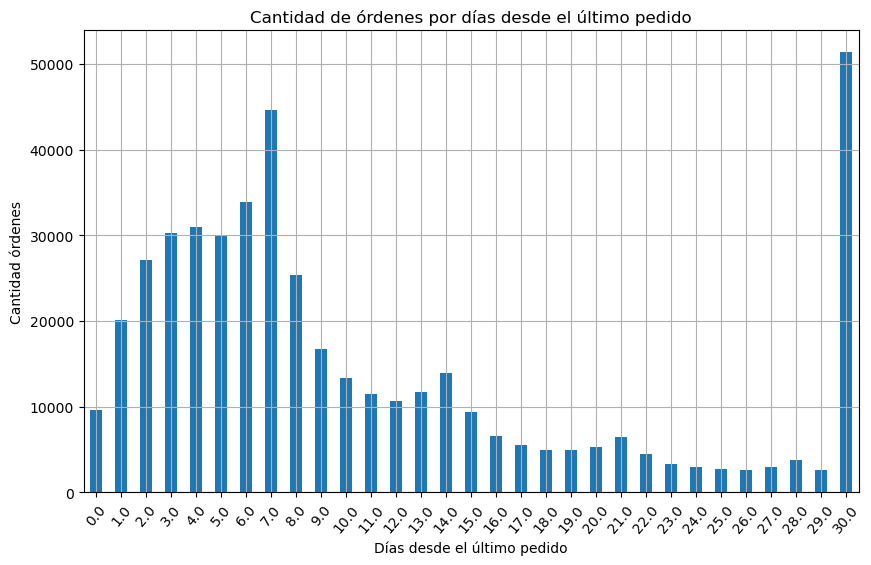

In [60]:
df_instacart_orders['days_since_prior_order'].value_counts().sort_index().plot(kind='bar',
                                                                                  xlabel='Días desde el último pedido', 
                                                                                  ylabel='Cantidad órdenes',
                                                                                  title='Cantidad de órdenes por días desde el último pedido',
                                                                                  grid=True,
                                                                                  figsize=(10, 6),
                                                                                  rot=50)
plt.show()

El gráfico muestra que la mayoría de los pedidos se realizan después de intervalos específicos, destacando los picos en 7 y 14 días. Esto sugiere que muchos clientes tienen patrones de compra semanales o mensuales. Los valores mínimos y máximos indican que hay clientes que hacen pedidos tanto de manera muy frecuente (al día siguiente) como después de largos periodos, pero la tendencia principal es la recurrencia mensual y semanal.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

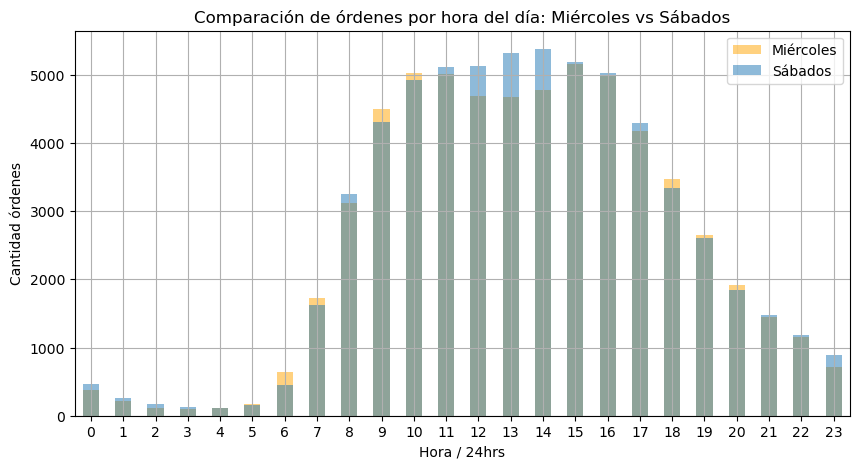

In [61]:
df_instacart_orders[df_instacart_orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
                                                                                                                         xlabel='Hora / 24hrs', 
                                                                                                                         ylabel='Cantidad órdenes',
                                                                                                                         grid=True,
                                                                                                                         figsize=(10, 5),
                                                                                                                         rot=0,
                                                                                                                         alpha =0.5,
                                                                                                                         color = 'orange')
df_instacart_orders[df_instacart_orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
                                                                                                                         xlabel='Hora / 24hrs', 
                                                                                                                         ylabel='Cantidad órdenes',
                                                                                                                         title='Comparación de órdenes por hora del día: Miércoles vs Sábados',
                                                                                                                         grid=True,
                                                                                                                         figsize=(10, 5),
                                                                                                                         rot=0, 
                                                                                                                         alpha=0.5)
plt.legend(['Miércoles', 'Sábados'])
plt.show()

Distribución de pedidos por hora en miércoles y sábados: Se observaron diferencias en los patrones horarios de compra entre ambos días. Por ejemplo, los sábados presentan un mayor volumen de pedidos en horas de la mañana y mediodía, mientras que los miércoles muestran una distribución más uniforme a lo largo del día. Esto sugiere que los hábitos de compra varían según el día de la semana, posiblemente por rutinas laborales y disponibilidad de tiempo.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

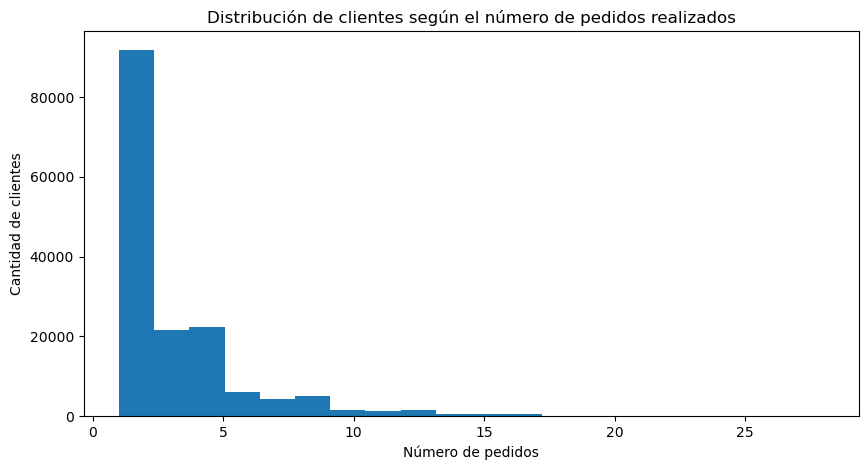

In [62]:
df_instacart_orders['user_id'].value_counts().plot(kind='hist', 
                                                   xlabel='Número de pedidos', 
                                                   ylabel='Cantidad de clientes',
                                                    title='Distribución de clientes según el número de pedidos realizados',
                                                    figsize=(10, 5),
                                                    bins=20)
plt.show()

Distribución del número de pedidos por cliente: La mayoría de los clientes realiza pocos pedidos, mientras que un grupo reducido realiza un número significativamente mayor.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [63]:
#obtenemos los 20 productos más pedidos
top_20_productos = df_order_products['product_id'].value_counts().head(20)

#reseteamos los index del nuevo DF
top_20_productos = top_20_productos.reset_index()

#renombramos las columnas del nuevo DF
top_20_productos.columns = ['product_id', 'cantidad_pedidos']

#Enlazamos los datos de los productos de 'top_20_productos' y 'df_products'
top_20_productos = top_20_productos.merge(df_products[['product_id', 'product_name']], on='product_id')
print(top_20_productos)

    product_id  cantidad_pedidos              product_name
0        24852             66050                    BANANA
1        13176             53297    BAG OF ORGANIC BANANAS
2        21137             37039      ORGANIC STRAWBERRIES
3        21903             33971      ORGANIC BABY SPINACH
4        47209             29773      ORGANIC HASS AVOCADO
5        47766             24689           ORGANIC AVOCADO
6        47626             21495               LARGE LEMON
7        16797             20018              STRAWBERRIES
8        26209             19690                     LIMES
9        27845             19600        ORGANIC WHOLE MILK
10       27966             19197       ORGANIC RASPBERRIES
11       22935             15898      ORGANIC YELLOW ONION
12       24964             15292            ORGANIC GARLIC
13       45007             14584          ORGANIC ZUCCHINI
14       39275             13879       ORGANIC BLUEBERRIES
15       49683             13675            CUCUMBER KIR

Productos más pedidos: Los productos más solicitados son principalmente frutas y verduras frescas, como plátanos, fresas y espinacas, lo que indica una preferencia por productos frescos y saludables entre los usuarios de la plataforma.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

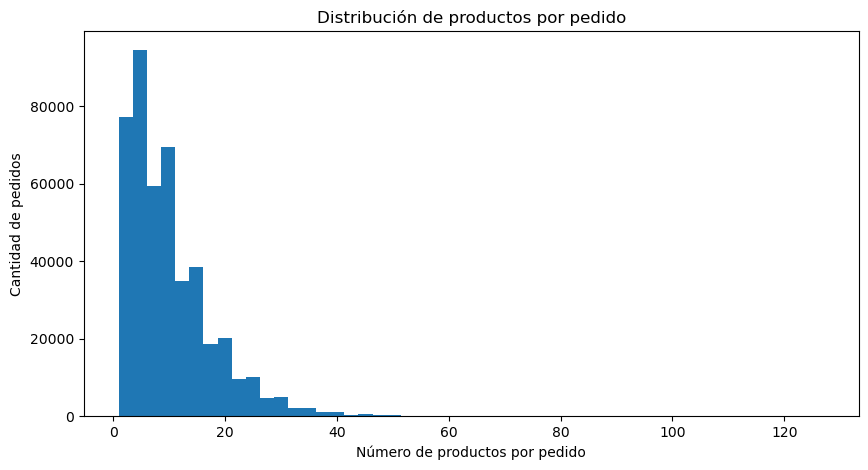

In [64]:
#Agrupamos por por órdenes para luego contarlos
df_order_products.groupby('order_id')['product_id'].count().plot(kind='hist', 
                                                                  xlabel='Número de productos por pedido', 
                                                                  ylabel='Cantidad de pedidos',
                                                                  title='Distribución de productos por pedido',
                                                                  figsize=(10, 5),
                                                                  bins=50)
plt.show()

El gráfico muestra que la mayoría de los pedidos contienen entre 1 y 10 productos, con una clara tendencia decrecer a medida que aumenta el número de artículos por pedido.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [65]:
# Filtra las filas donde el producto fue reordenado ('reordered' == 1), 
# cuenta cuántas veces se reordenó cada 'product_id' y selecciona los 20 más frecuentes
top_20_repetidos = df_order_products[df_order_products['reordered'] == 1]['product_id'].value_counts().head(20)

# Convierte el resultado anterior en un DataFrame y reinicia el índice para que 'product_id' sea una columna
top_20_repetidos = top_20_repetidos.reset_index()

# Renombra las columnas para mayor claridad
top_20_repetidos.columns = ['product_id', 'cantidad_repetidos']

# Une el DataFrame con la tabla de productos para obtener el nombre de cada producto
top_20_repetidos = top_20_repetidos.merge(df_products[['product_id', 'product_name']], on='product_id')

# Muestra el resultado final
print(top_20_repetidos)

    product_id  cantidad_repetidos              product_name
0        24852               55763                    BANANA
1        13176               44450    BAG OF ORGANIC BANANAS
2        21137               28639      ORGANIC STRAWBERRIES
3        21903               26233      ORGANIC BABY SPINACH
4        47209               23629      ORGANIC HASS AVOCADO
5        47766               18743           ORGANIC AVOCADO
6        27845               16251        ORGANIC WHOLE MILK
7        47626               15044               LARGE LEMON
8        27966               14748       ORGANIC RASPBERRIES
9        16797               13945              STRAWBERRIES
10       26209               13327                     LIMES
11       22935               11145      ORGANIC YELLOW ONION
12       24964               10411            ORGANIC GARLIC
13       45007               10076          ORGANIC ZUCCHINI
14       49683                9538            CUCUMBER KIRBY
15       28204          

Se observa que los productos más reordenados son principalmente frutas y verduras frescas, como plátanos, fresas, espinacas y aguacates. Esto indica que estos productos forman parte esencial de las compras recurrentes de los usuarios.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [66]:
# Calcula la tasa de repetición para cada producto: veces que se vuelve a pedir
df_product_reorder_rate = df_order_products.groupby('product_id')['reordered'].mean().reset_index()
df_product_reorder_rate.columns = ['product_id', 'reorder_rate']

# Une con los nombres de los productos para mejor interpretación
df_product_reorder_rate = df_product_reorder_rate.merge(df_products[['product_id', 'product_name']], on='product_id')

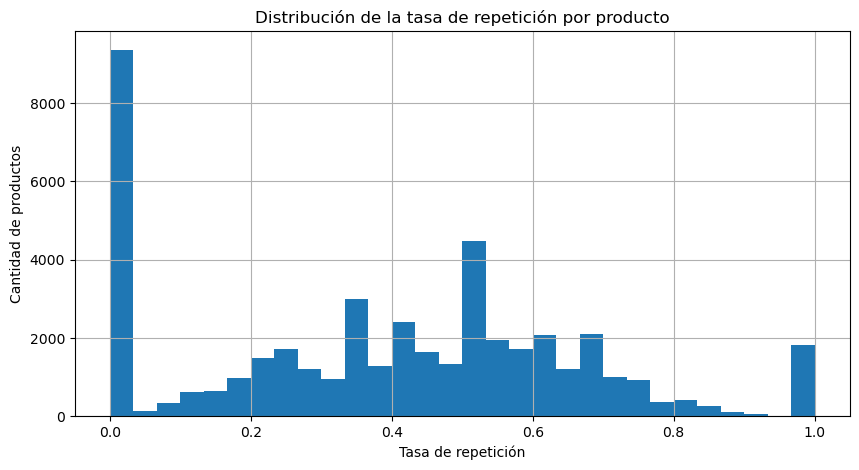

In [67]:
# Usamos un histograma para ver la tasa de reordenamiento
df_product_reorder_rate['reorder_rate'].plot(kind='hist', bins=30, figsize=(10,5), grid=True,
                                             xlabel='Tasa de repetición', 
                                             ylabel='Cantidad de productos',
                                             title='Distribución de la tasa de repetición por producto')
plt.show()

La gráfica muestra que la mayoría de los productos tienen una tasa de repetición intermedia, es decir, son reordenados por los clientes en una proporción moderada. Sin embargo, existen algunos productos con tasas de repetición muy altas, lo que indica que son artículos de compra frecuente, mientras que otros productos presentan tasas bajas, sugiriendo que suelen ser adquiridos solo ocasionalmente o por primera vez.


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [68]:
# agrega la columna 'user_id' a cada fila de df_order_products, permitiendo saber a qué usuario pertenece cada pedido.
df_user_reorder = df_order_products.merge(df_instacart_orders[['order_id', 'user_id']], on='order_id')

# Se agrupa el DataFrame resultante por 'user_id' y se calcula el promedio de la columna 'reordered' para cada usuario.
user_reorder_rate = df_user_reorder.groupby('user_id')['reordered'].mean().reset_index()

# Se renombran las columnas para mayor claridad.
user_reorder_rate.columns = ['user_id', 'reorder_rate']

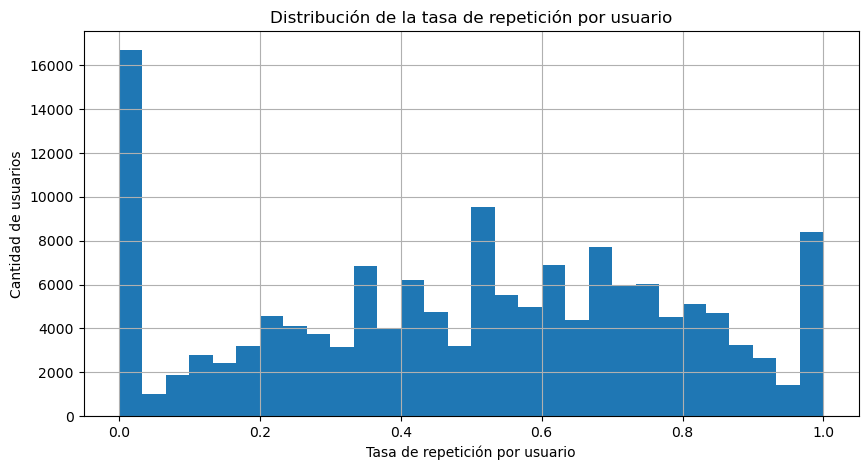

In [69]:
user_reorder_rate['reorder_rate'].plot(kind='hist', bins=30, figsize=(10,5), grid=True,
                                       xlabel='Tasa de repetición por usuario',
                                       ylabel='Cantidad de usuarios',
                                       title='Distribución de la tasa de repetición por usuario')
plt.show()

Se visualiza que existe una amplia variabilidad en los hábitos de recompra entre los clientes. Mientras que algunos usuarios tienden a repetir la compra de productos con frecuencia, otros presentan tasas de repetición mucho menores. La mayoría de los usuarios tiene una tasa de repetición intermedia, lo que indica que suelen volver a pedir algunos de los productos que ya han comprado anteriormente.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [70]:
# Filtra las filas donde el producto fue el primero en añadirse al carrito ('add_to_cart_order' == 1)
primeros_productos = df_order_products[df_order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)

# Convierte el resultado en un DataFrame y reinicia el índice para que 'product_id' sea una columna
primeros_productos = primeros_productos.reset_index()

# Renombra las columnas para mayor claridad
primeros_productos.columns = ['product_id', 'amount']

# Une el DataFrame con la tabla de productos para obtener el nombre de cada producto
primeros_productos = primeros_productos.merge(df_products[['product_id', 'product_name']], on='product_id')

# Muestra el resultado final
print(primeros_productos)

    product_id  amount                 product_name
0        24852   15562                       BANANA
1        13176   11026       BAG OF ORGANIC BANANAS
2        27845    4363           ORGANIC WHOLE MILK
3        21137    3946         ORGANIC STRAWBERRIES
4        47209    3390         ORGANIC HASS AVOCADO
5        21903    3336         ORGANIC BABY SPINACH
6        47766    3044              ORGANIC AVOCADO
7        19660    2336                 SPRING WATER
8        16797    2308                 STRAWBERRIES
9        27966    2024          ORGANIC RASPBERRIES
10       44632    1914   SPARKLING WATER GRAPEFRUIT
11       49235    1797          ORGANIC HALF & HALF
12       47626    1737                  LARGE LEMON
13         196    1733                         SODA
14       38689    1397     ORGANIC REDUCED FAT MILK
15       26209    1370                        LIMES
16       12341    1340                HASS AVOCADOS
17        5785    1310  ORGANIC REDUCED FAT 2% MILK
18       270

Se observa que los productos más comunes en esta posición son principalmente frutas frescas, lácteos y bebidas, como plátanos, leche y agua. Esto sugiere que estos artículos suelen ser prioritarios o esenciales en las compras de los usuarios, probablemente porque forman parte habitual de su lista de compras o son productos de consumo recurrente.

### Conclusion general del proyecto:

Durante el desarrollo del proyecto, se realizó un exhaustivo proceso de limpieza y análisis de los datos de pedidos de Instacart. Se identificaron y eliminaron duplicados, se gestionaron valores ausentes de manera adecuada y se validó la integridad de los datos en las tablas principales. El análisis exploratorio permitió descubrir patrones de comportamiento de los usuarios, como la preferencia por realizar pedidos en ciertos días y horas, la recurrencia en la compra de productos frescos y la existencia de hábitos de recompra tanto a nivel de producto como de usuario. Estos hallazgos proporcionan información valiosa para la toma de decisiones comerciales, la personalización de ofertas y la optimización de la experiencia del cliente en plataformas de compras en línea.